In [24]:
# import all the necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
data = pd.read_csv('./train.csv')
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [26]:
# sample 1 million random samples. randome state=3
df = data.sample(n=1000000, random_state=3)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
19842600,2012-02-25 17:07:00.00000032,6.1,2012-02-25 17:07:00 UTC,-73.955980,40.775667,-73.955725,40.764260,2
53238904,2012-08-30 20:34:02.0000002,10.9,2012-08-30 20:34:02 UTC,-74.001193,40.721218,-73.977048,40.752003,3
34225585,2013-03-07 07:36:00.00000049,14.5,2013-03-07 07:36:00 UTC,-73.971307,40.797807,-73.979302,40.763392,5
27897615,2013-08-06 19:49:42.0000003,22.5,2013-08-06 19:49:42 UTC,-73.970516,40.796686,-73.985240,40.734936,1
32296440,2009-08-27 13:19:04.0000002,10.1,2009-08-27 13:19:04 UTC,-73.976740,40.752030,-73.985731,40.733572,1


In [27]:
# look at basic info of data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 19842600 to 2419759
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999996 non-null   float64
 6   dropoff_latitude   999996 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [28]:
# check out detailed description

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1000000.000000,1000000.000000,1000000.000000,999996.000000,999996.000000,1000000.000000
mean,11.432915,-72.499452,39.924727,-72.499718,39.912817,1.685945
std,94.459032,11.080002,9.375887,11.695252,8.157435,1.309188
min,-70.000000,-1614.679270,-2525.666413,-1538.466667,-3114.324368,0.000000
25%,6.000000,-73.992090,40.734908,-73.991394,40.734053,1.000000
50%,8.500000,-73.981818,40.752627,-73.980149,40.753145,1.000000
75%,12.500000,-73.967117,40.767121,-73.963675,40.768039,2.000000
max,93963.360000,2505.494292,3210.359292,3017.210895,1963.515858,6.000000


In [29]:
# remove rows with null values

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999996 entries, 19842600 to 2419759
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999996 non-null  object 
 1   fare_amount        999996 non-null  float64
 2   pickup_datetime    999996 non-null  object 
 3   pickup_longitude   999996 non-null  float64
 4   pickup_latitude    999996 non-null  float64
 5   dropoff_longitude  999996 non-null  float64
 6   dropoff_latitude   999996 non-null  float64
 7   passenger_count    999996 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


In [30]:
# see description now

df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999996.000000,999996.000000,999996.000000,999996.000000,999996.000000,999996.000000
mean,11.432867,-72.499446,39.924724,-72.499718,39.912817,1.685952
std,94.459212,11.080024,9.375906,11.695252,8.157435,1.309186
min,-70.000000,-1614.679270,-2525.666413,-1538.466667,-3114.324368,0.000000
25%,6.000000,-73.992090,40.734908,-73.991394,40.734053,1.000000
50%,8.500000,-73.981819,40.752627,-73.980149,40.753145,1.000000
75%,12.500000,-73.967117,40.767121,-73.963675,40.768039,2.000000
max,93963.360000,2505.494292,3210.359292,3017.210895,1963.515858,6.000000


In [31]:
# remove negative fare values, out of range latitude/longitude for pickup/dropoff

df = df.drop(df[df['fare_amount']<0].index, axis=0)

df = df.drop(df[df['pickup_longitude']<-180].index, axis=0)
df = df.drop(df[df['pickup_longitude']>180].index, axis=0)
df = df.drop(df[df['dropoff_longitude']<-180].index, axis=0)
df = df.drop(df[df['dropoff_longitude']>180].index, axis=0)

df = df.drop(df[df['pickup_latitude']<-90].index, axis=0)
df = df.drop(df[df['pickup_latitude']>90].index, axis=0)
df = df.drop(df[df['dropoff_latitude']<-90].index, axis=0)
df = df.drop(df[df['dropoff_latitude']>90].index, axis=0)


In [32]:
# check out edited data (max/min longitude/latitude matches NYC of around 40N 70W coordinates)
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999905 entries, 19842600 to 2419759
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                999905 non-null  object 
 1   fare_amount        999905 non-null  float64
 2   pickup_datetime    999905 non-null  object 
 3   pickup_longitude   999905 non-null  float64
 4   pickup_latitude    999905 non-null  float64
 5   dropoff_longitude  999905 non-null  float64
 6   dropoff_latitude   999905 non-null  float64
 7   passenger_count    999905 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 68.7+ MB


None

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999905.000000,999905.000000,999905.000000,999905.000000,999905.000000,999905.000000
mean,11.433893,-72.495506,39.914048,-72.500170,39.916031,1.685949
std,94.463249,10.472735,6.148859,10.454065,6.142904,1.309183
min,0.000000,-91.915019,-74.016880,-91.915019,-74.186078,0.000000
25%,6.000000,-73.992090,40.734910,-73.991394,40.734054,1.000000
50%,8.500000,-73.981819,40.752627,-73.980149,40.753145,1.000000
75%,12.500000,-73.967118,40.767120,-73.963675,40.768040,2.000000
max,93963.360000,40.813802,81.480450,40.866992,81.486690,6.000000


In [33]:
# Find massive fare amount(93963) outlier and remove it

display(df[df['fare_amount']>1000])


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
41032263,2015-02-24 08:57:37.0000004,93963.36,2015-02-24 08:57:37 UTC,-73.994461,40.712353,-74.012543,40.702904,2


In [34]:
#remove fare_amount's over 1000
df = df.drop(df[df['fare_amount']>1000].index, axis=0)
display(df.describe())
display(df.head())

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999904.000000,999904.000000,999904.000000,999904.000000,999904.000000,999904.000000
mean,11.339932,-72.495504,39.914047,-72.500169,39.916030,1.685949
std,9.771631,10.472741,6.148862,10.454071,6.142907,1.309183
min,0.000000,-91.915019,-74.016880,-91.915019,-74.186078,0.000000
25%,6.000000,-73.992090,40.734910,-73.991394,40.734054,1.000000
50%,8.500000,-73.981819,40.752627,-73.980149,40.753145,1.000000
75%,12.500000,-73.967118,40.767120,-73.963675,40.768040,2.000000
max,978.000000,40.813802,81.480450,40.866992,81.486690,6.000000


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
19842600,2012-02-25 17:07:00.00000032,6.1,2012-02-25 17:07:00 UTC,-73.955980,40.775667,-73.955725,40.764260,2
53238904,2012-08-30 20:34:02.0000002,10.9,2012-08-30 20:34:02 UTC,-74.001193,40.721218,-73.977048,40.752003,3
34225585,2013-03-07 07:36:00.00000049,14.5,2013-03-07 07:36:00 UTC,-73.971307,40.797807,-73.979302,40.763392,5
27897615,2013-08-06 19:49:42.0000003,22.5,2013-08-06 19:49:42 UTC,-73.970516,40.796686,-73.985240,40.734936,1
32296440,2009-08-27 13:19:04.0000002,10.1,2009-08-27 13:19:04 UTC,-73.976740,40.752030,-73.985731,40.733572,1


In [35]:
# describe fare_amount data
df['fare_amount'].describe()

count    999904.000000
mean         11.339932
std           9.771631
min           0.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         978.000000
Name: fare_amount, dtype: float64

In [36]:
# find distance between latitude and longitude pickup and dropoff
df['latitude_difference'] = (df['pickup_latitude'] - df['dropoff_latitude']).abs()
df['longitude_difference'] = (df['pickup_longitude'] - df['dropoff_longitude']).abs()
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,latitude_difference,longitude_difference
19842600,2012-02-25 17:07:00.00000032,6.1,2012-02-25 17:07:00 UTC,-73.955980,40.775667,-73.955725,40.764260,2,0.011407,0.000255
53238904,2012-08-30 20:34:02.0000002,10.9,2012-08-30 20:34:02 UTC,-74.001193,40.721218,-73.977048,40.752003,3,0.030785,0.024145
34225585,2013-03-07 07:36:00.00000049,14.5,2013-03-07 07:36:00 UTC,-73.971307,40.797807,-73.979302,40.763392,5,0.034415,0.007995
27897615,2013-08-06 19:49:42.0000003,22.5,2013-08-06 19:49:42 UTC,-73.970516,40.796686,-73.985240,40.734936,1,0.061750,0.014724
32296440,2009-08-27 13:19:04.0000002,10.1,2009-08-27 13:19:04 UTC,-73.976740,40.752030,-73.985731,40.733572,1,0.018458,0.008991


In [37]:
# perfrom quantile-cut binning to turn fare_amount into 3 categories (low, medium, high)
ret_bins = []
df_binned = df
df_binned['fare_category'], ret_bins = pd.qcut(df['fare_amount'], q=3, labels=['low', 'medium', 'high'], retbins=True)
print('Bin ranges:',ret_bins)
print('\nNumber in each bin:')

df_binned['fare_category'].value_counts()


Bin ranges: [  0.    6.5  10.9 978. ]

Number in each bin:


medium    340816
low       333653
high      325435
Name: fare_category, dtype: int64

In [38]:
#change order of columns

col_order = list(df_binned.columns.values)
col_order.insert(2, col_order.pop())
df_binned = df_binned[col_order]
df_binned.head()

,key,fare_amount,fare_category,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,latitude_difference,longitude_difference
19842600,2012-02-25 17:07:00.00000032,6.1,low,2012-02-25 17:07:00 UTC,-73.955980,40.775667,-73.955725,40.764260,2,0.011407,0.000255
53238904,2012-08-30 20:34:02.0000002,10.9,medium,2012-08-30 20:34:02 UTC,-74.001193,40.721218,-73.977048,40.752003,3,0.030785,0.024145
34225585,2013-03-07 07:36:00.00000049,14.5,high,2013-03-07 07:36:00 UTC,-73.971307,40.797807,-73.979302,40.763392,5,0.034415,0.007995
27897615,2013-08-06 19:49:42.0000003,22.5,high,2013-08-06 19:49:42 UTC,-73.970516,40.796686,-73.985240,40.734936,1,0.061750,0.014724
32296440,2009-08-27 13:19:04.0000002,10.1,medium,2009-08-27 13:19:04 UTC,-73.976740,40.752030,-73.985731,40.733572,1,0.018458,0.008991


In [39]:
# check fare_category

df_binned['fare_category'].describe()

count     999904
unique         3
top       medium
freq      340816
Name: fare_category, dtype: object

In [40]:
# convert object to datetime object so we can access specific attributes

date_df = df_binned
date_df['pickup_datetime'] = pd.to_datetime(date_df['pickup_datetime'])
date_df['pickup_datetime'].info()

<class 'pandas.core.series.Series'>
Int64Index: 999904 entries, 19842600 to 2419759
Series name: pickup_datetime
Non-Null Count   Dtype              
--------------   -----              
999904 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 15.3 MB


In [41]:
# change timestamp to day/month/year/hour/minute/second features

date_df['pickup_year'] = date_df['pickup_datetime'].dt.year
date_df['pickup_month'] = date_df['pickup_datetime'].dt.month
date_df['pickup_day'] = date_df['pickup_datetime'].dt.day
date_df['pickup_hour'] = date_df['pickup_datetime'].dt.hour
date_df['pickup_minute'] = date_df['pickup_datetime'].dt.minute
date_df['pickup_second'] = date_df['pickup_datetime'].dt.second

date_df[['pickup_datetime','pickup_year','pickup_month','pickup_day','pickup_hour','pickup_minute','pickup_second' ]].head()

,pickup_datetime,pickup_year,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second
19842600,2012-02-25 17:07:00+00:00,2012,2,25,17,7,0
53238904,2012-08-30 20:34:02+00:00,2012,8,30,20,34,2
34225585,2013-03-07 07:36:00+00:00,2013,3,7,7,36,0
27897615,2013-08-06 19:49:42+00:00,2013,8,6,19,49,42
32296440,2009-08-27 13:19:04+00:00,2009,8,27,13,19,4


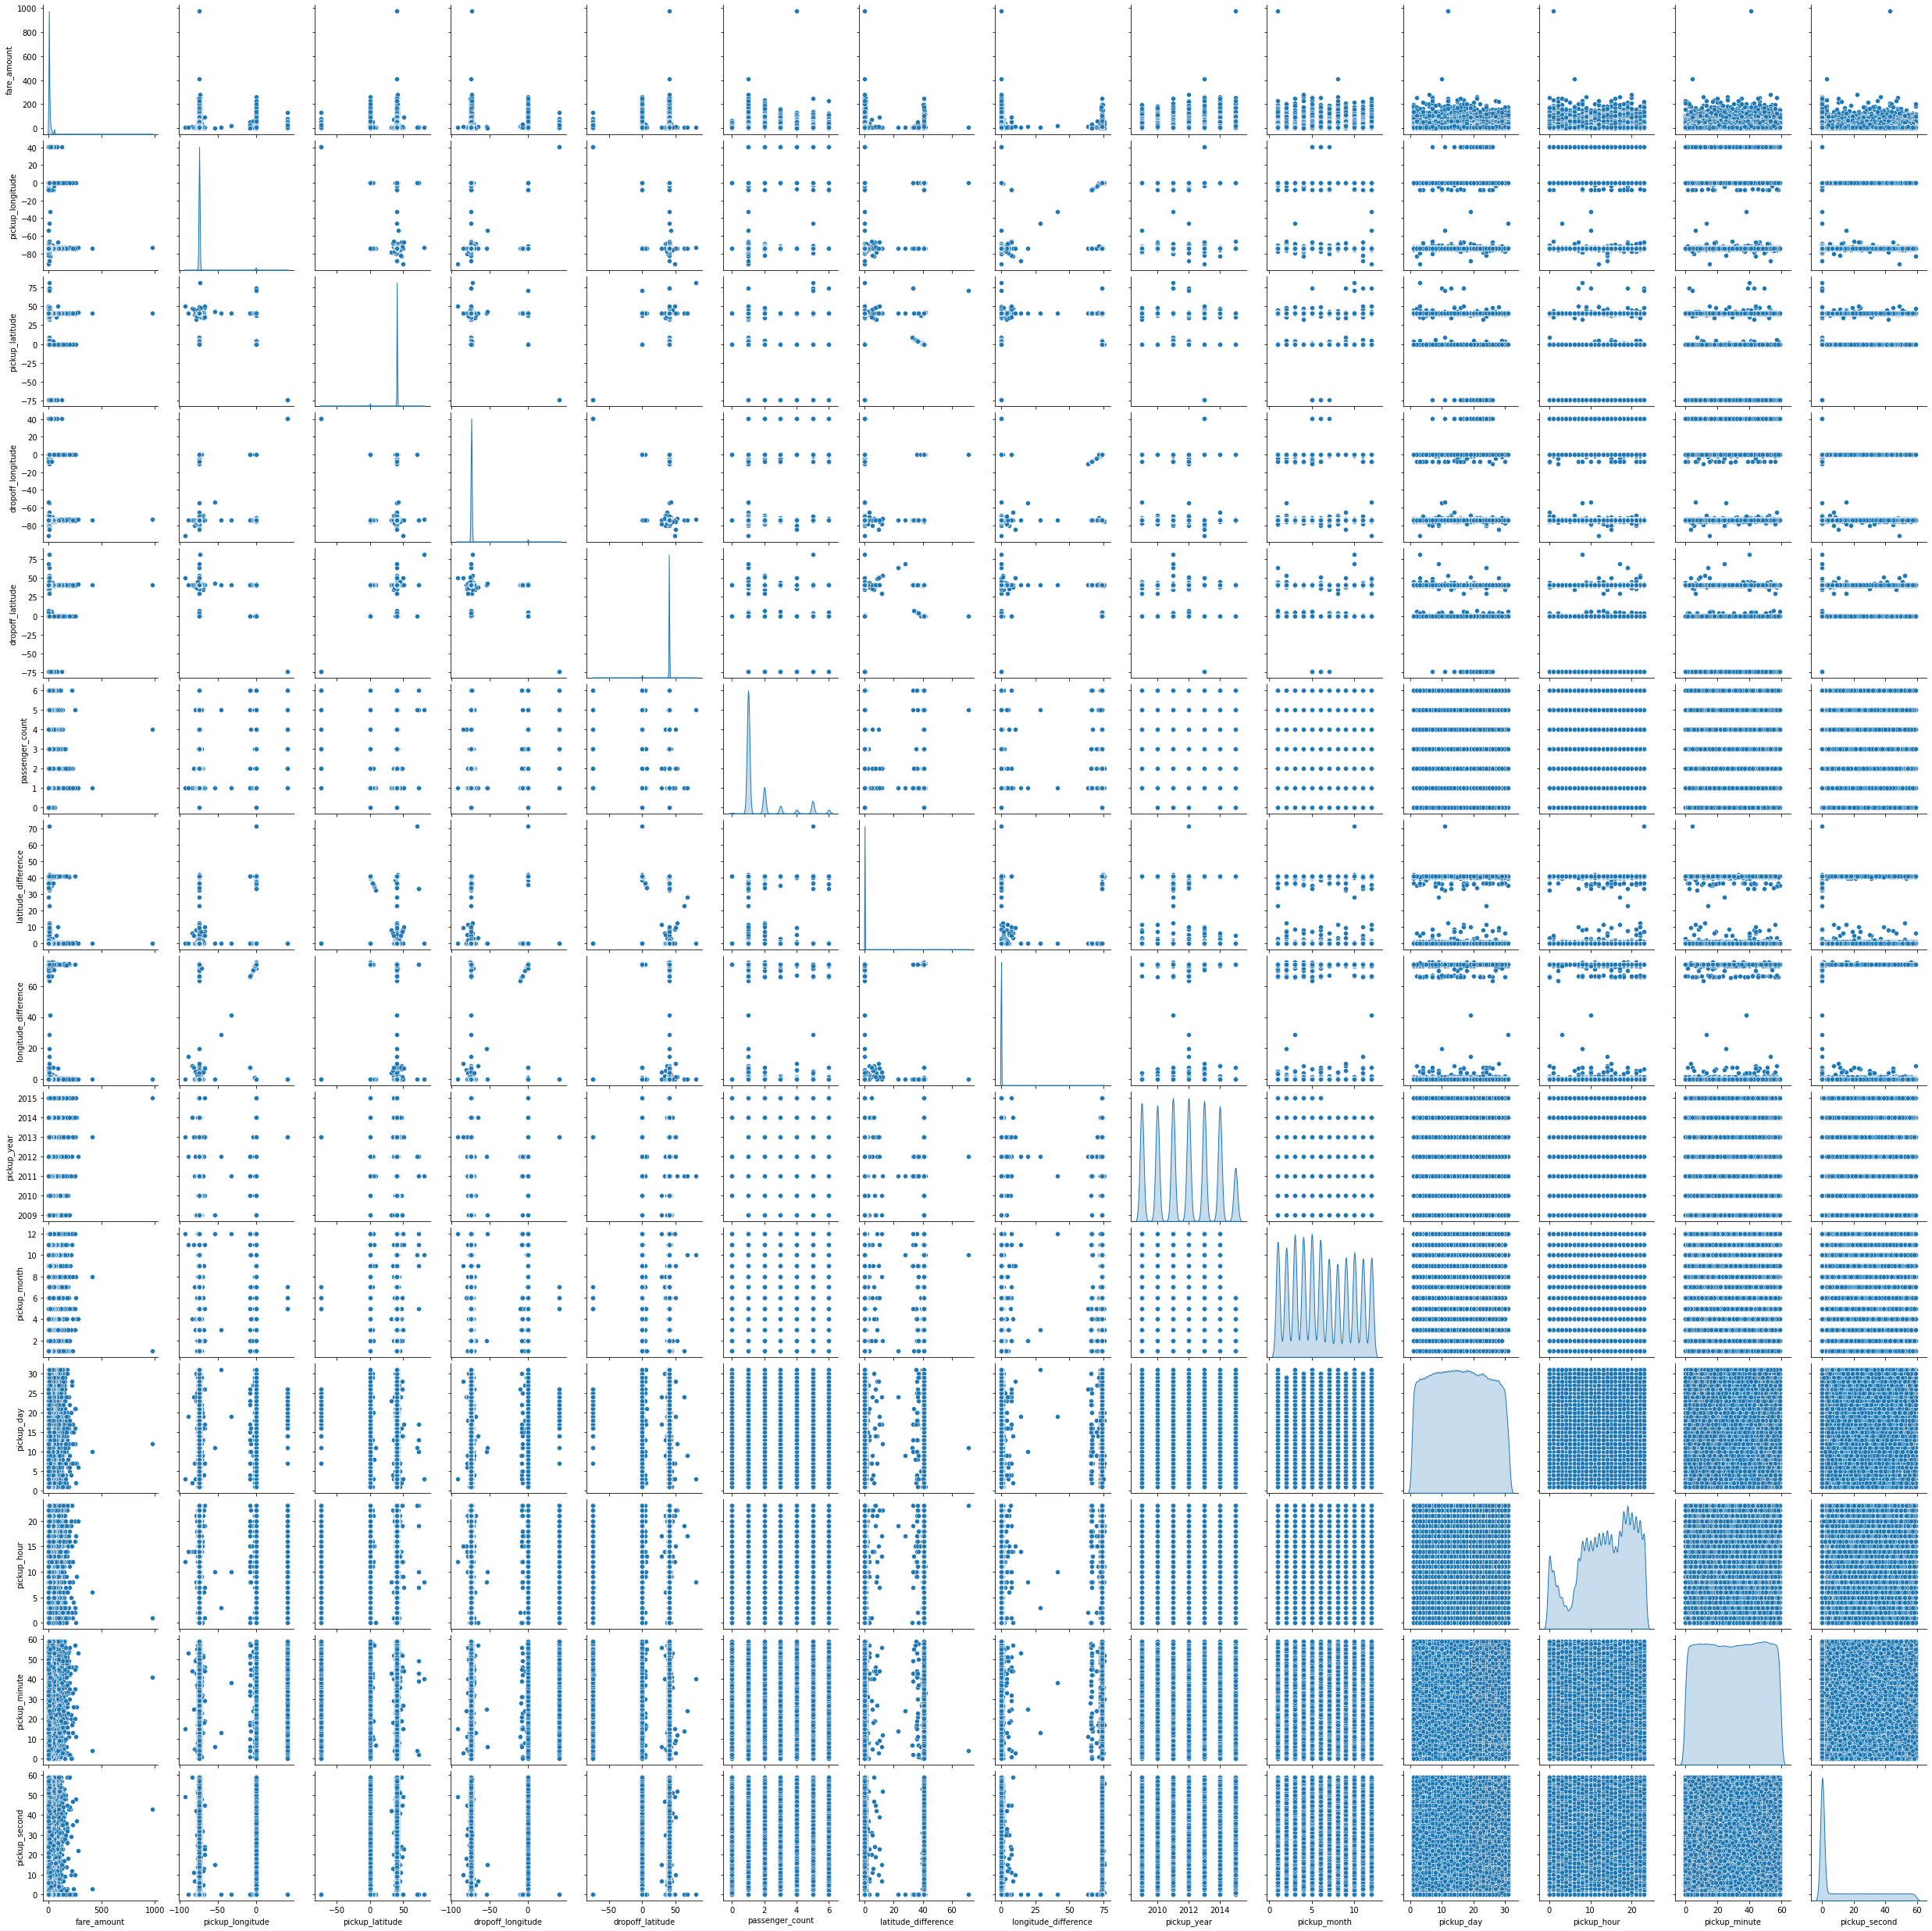

In [42]:
# use seaborn pairplot to look at data

#pairplot of all features

sns.pairplot(data=date_df, diag_kind='kde')
plt.show()

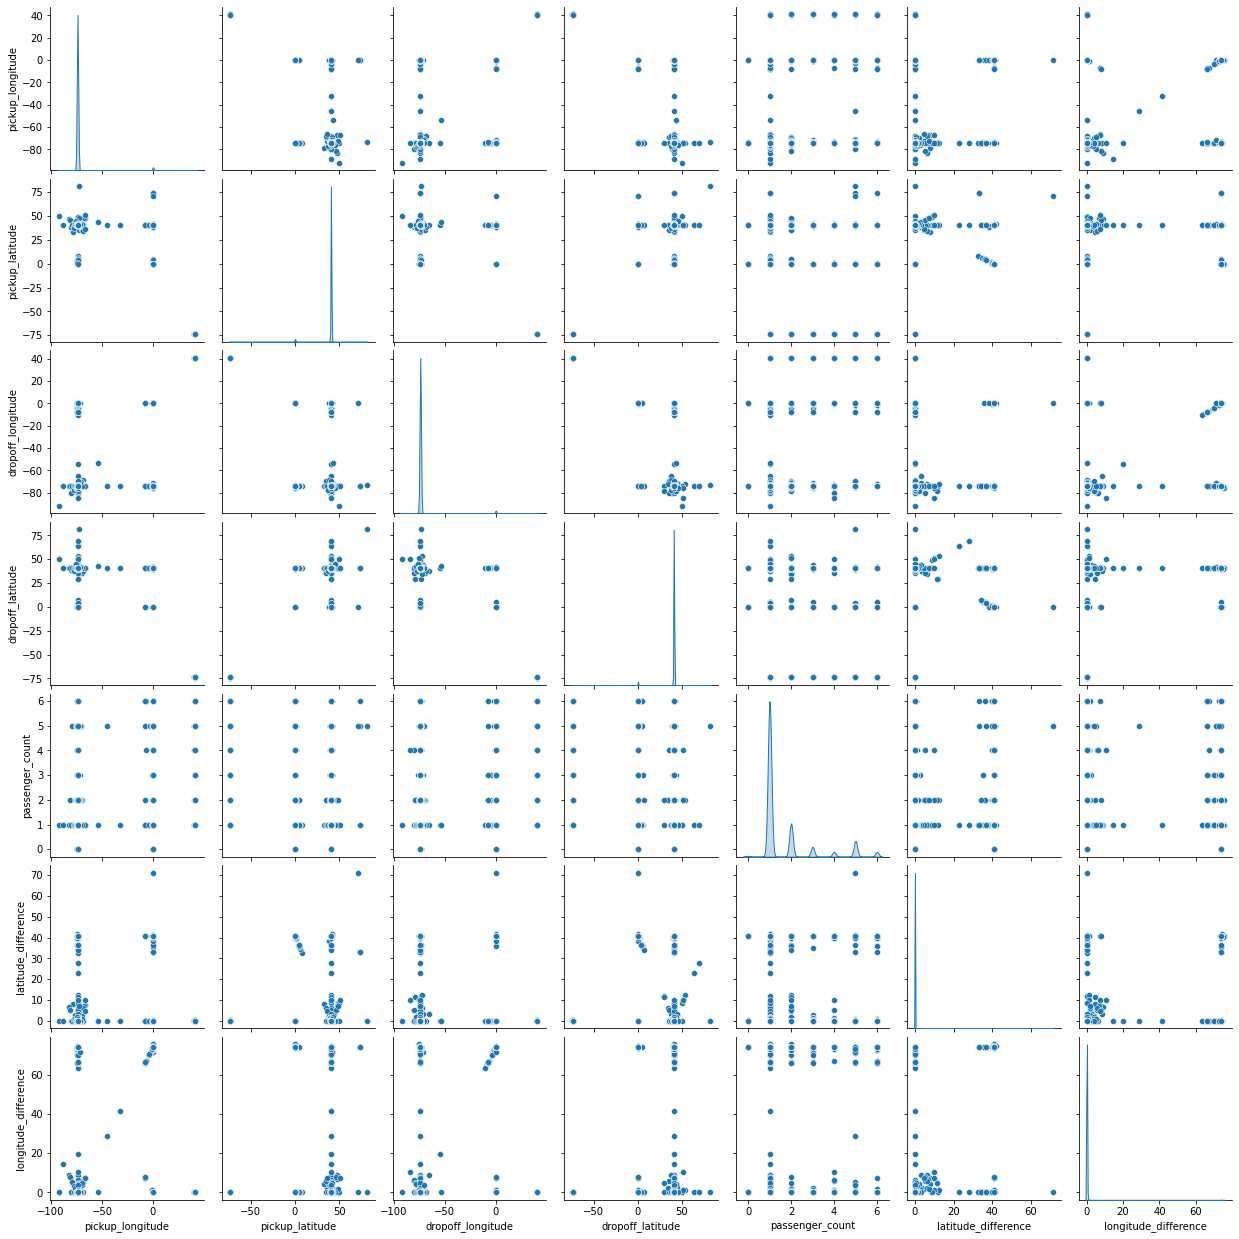

In [45]:
# pairplot of all features not including time

df_notime = date_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'latitude_difference', 'longitude_difference']]
df_time = date_df[['pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute', 'pickup_second', 'fare_amount', 'fare_category']]

sns.pairplot(data=df_notime, diag_kind='kde')
plt.show()

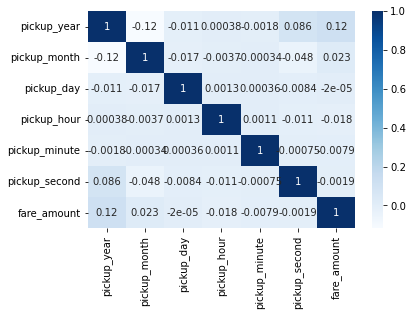

In [46]:
#heatmpa of all features not including time

sns.heatmap(df_time[['pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute', 'pickup_second', 'fare_amount']].corr(), cmap='Blues', annot=True)
plt.show()

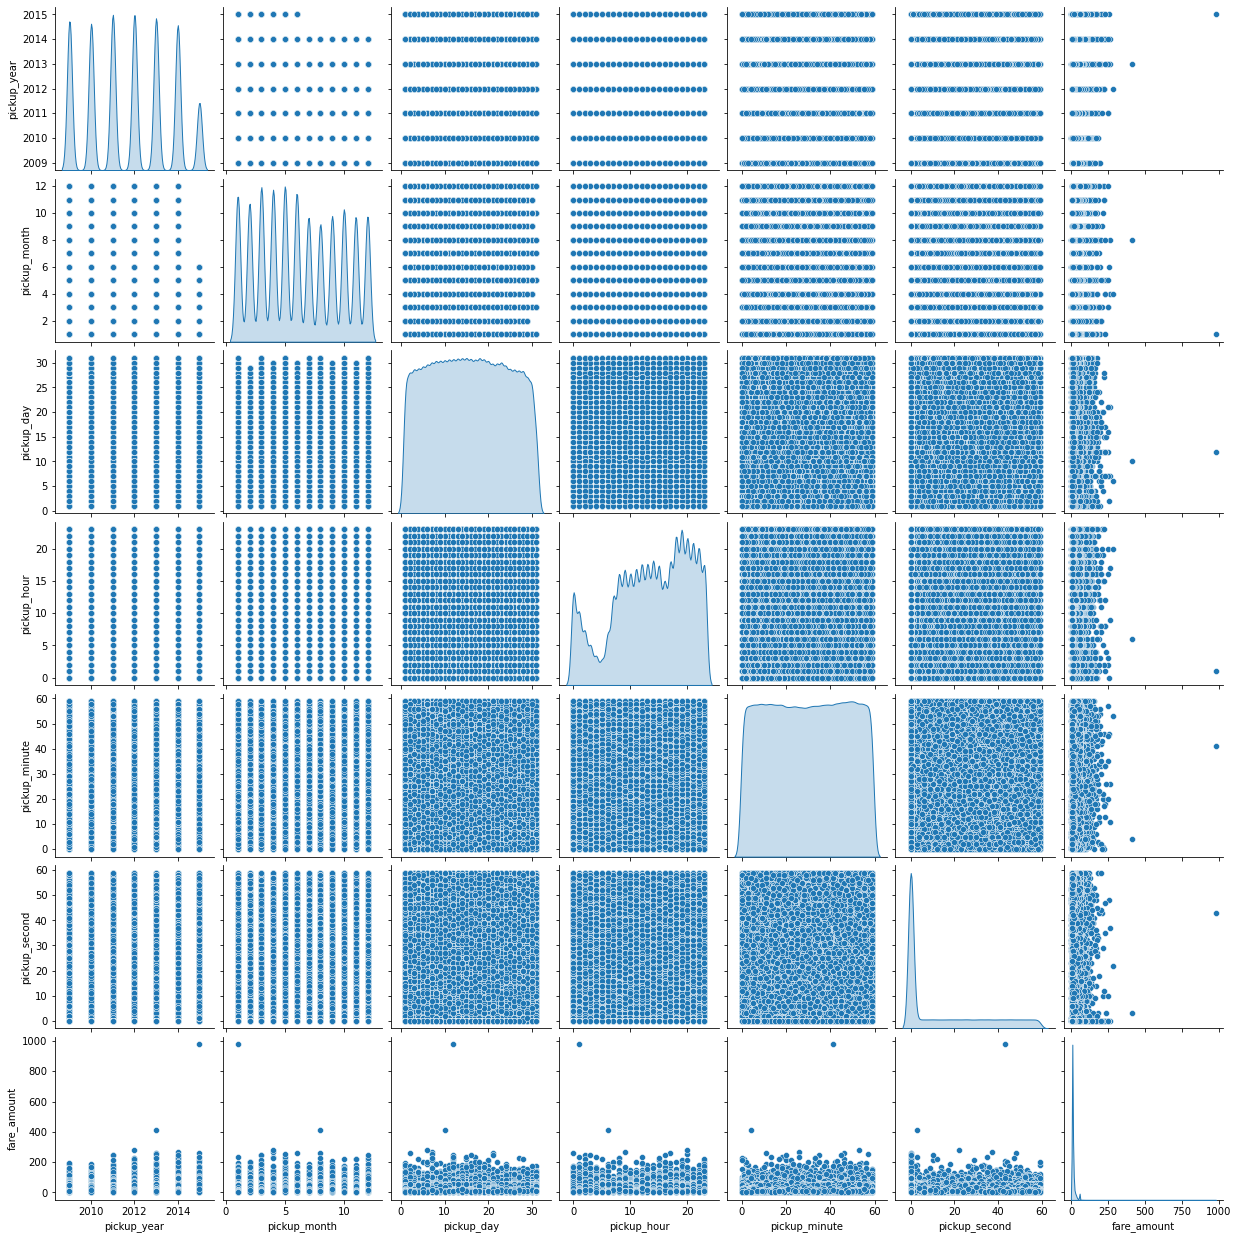

In [47]:
# pairplot of all pickup time features and fare amount

sns.pairplot(data=df_time, diag_kind='kde')
plt.show()

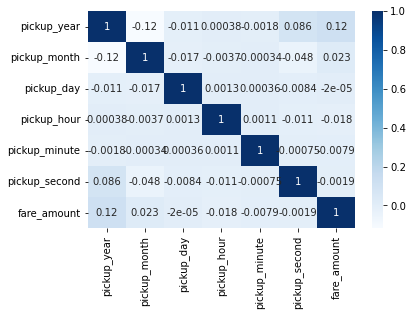

In [48]:
#heatmap of all time features and fare amount

sns.heatmap(df_time[['pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute', 'pickup_second', 'fare_amount']].corr(), cmap='Blues', annot=True)
plt.show()

In [49]:
# # make feature matrix
# feature_cols = list(date_df.columns)
# feature_cols.remove('key')
# feature_cols.remove('fare_amount')
# feature_cols.remove('pickup_datetime')
# feature_cols.remove('fare_category')

feature_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'latitude_difference', 'longitude_difference']
feature_cols_with_time = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'latitude_difference', 'longitude_difference',
                         'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'pickup_minute', 'pickup_second']
print(feature_cols)
X_time = date_df[feature_cols_with_time]
X = date_df[feature_cols]
X.head()

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'latitude_difference', 'longitude_difference']


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,latitude_difference,longitude_difference
19842600,-73.955980,40.775667,-73.955725,40.764260,2,0.011407,0.000255
53238904,-74.001193,40.721218,-73.977048,40.752003,3,0.030785,0.024145
34225585,-73.971307,40.797807,-73.979302,40.763392,5,0.034415,0.007995
27897615,-73.970516,40.796686,-73.985240,40.734936,1,0.061750,0.014724
32296440,-73.976740,40.752030,-73.985731,40.733572,1,0.018458,0.008991


In [50]:
# create label vector for classifiers
y = date_df['fare_category']
y.head()

19842600       low
53238904    medium
34225585      high
27897615      high
32296440    medium
Name: fare_category, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

### Linear Regression Model

In [51]:
# create label vector for linear regression
y_lr = date_df['fare_amount']
y_lr.head()

19842600     6.1
53238904    10.9
34225585    14.5
27897615    22.5
32296440    10.1
Name: fare_amount, dtype: float64

In [52]:
# check sizes of X and y
display(X.shape)
y_lr.shape

(999904, 7)

(999904,)

In [53]:
# split with test_size=0.25, random_state=2


X_train, X_test, y_lr_train, y_lr_test = train_test_split(X, y_lr, test_size=0.25, random_state=2)
X_train_time, X_test_time, y_lr_train, y_lr_test = train_test_split(X_time, y_lr, test_size=0.25, random_state=2)


In [54]:


my_linreg = LinearRegression()
my_linreg_time = LinearRegression()

my_linreg.fit(X_train, y_lr_train)
my_linreg_time.fit(X_train_time, y_lr_train)

LinearRegression()

In [55]:
print(my_linreg.intercept_)

print(my_linreg.coef_)

print(my_linreg_time.intercept_)

print(my_linreg_time.coef_)

11.644909476811426
[ 0.01635727  0.0728925  -0.01810107 -0.08856885  0.10785652  0.07665861
  0.05120712]
-1278.9025709251607
[ 0.02118053  0.07693855 -0.01536881 -0.07864492  0.09159985  0.0742891
  0.04304787  0.64144463  0.10646422  0.00206806 -0.02698856 -0.00425003
 -0.00400022]


In [56]:
y_lr_prediction = my_linreg.predict(X_test)
y_lr_prediction_time = my_linreg_time.predict(X_test_time)

print(y_lr_prediction)
print(max(y_lr_prediction))
print(max(y_lr_test))

[11.35860561 11.24361185 11.35114194 ... 11.24359205 11.56685257
 11.67422208]
22.848595321183232
264.0


In [57]:

mse = metrics.mean_squared_error(y_lr_test, y_lr_prediction)

rmse = np.sqrt(mse)

print('RMSE without time',rmse)

mse = metrics.mean_squared_error(y_lr_test, y_lr_prediction_time)

rmse = np.sqrt(mse)

print('RMSE with time',rmse)


# Use model with time because it has a slightly lower RMSE

RMSE without time 9.642968983922552
RMSE with time 9.573300577598333


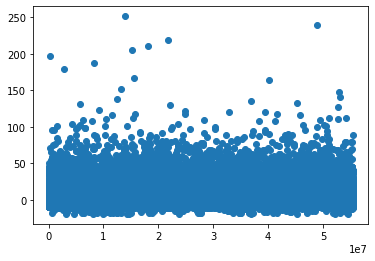

In [58]:

g = plt.plot(y_lr_test - y_lr_prediction_time, marker='o',linestyle='')

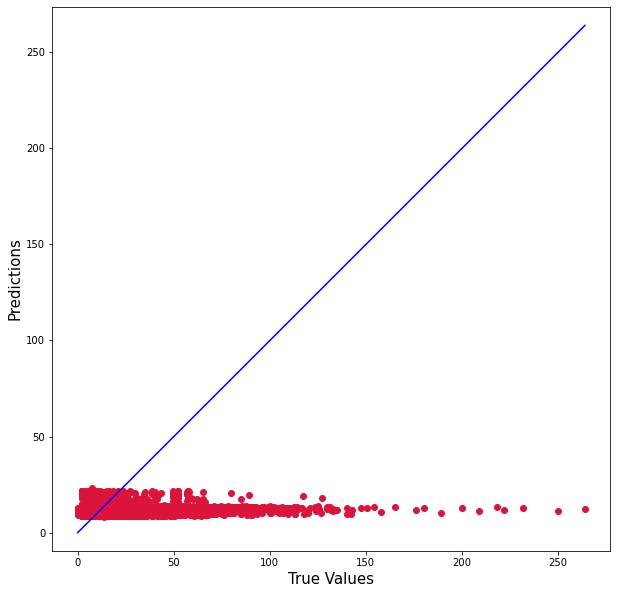

In [59]:
# plot predicted values versus actual. The linear regression model is extremely innacurate as fare amount increases

plt.figure(figsize=(10,10))
plt.scatter(y_lr_test, y_lr_prediction_time, c='crimson')

p1 = max(max(y_lr_prediction_time), max(y_lr_test))
p2 = min(min(y_lr_prediction_time), min(y_lr_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Classifiers

In [60]:
# Split sets that will be used for all classifiers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)
X_train_time, X_test_time, y_train, y_test = train_test_split(X_time, y, test_size=0.25, random_state=6)

In [61]:
# Print size of training and test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(749928, 7)
(749928,)
(249976, 7)
(249976,)


### Decision Tree

In [62]:
# create decision tree, random_state=5 and fit
my_decisiontree = DecisionTreeClassifier(random_state=5)
my_decisiontree.fit(X_train, y_train)

my_decisiontree_time = DecisionTreeClassifier(random_state=5)
my_decisiontree_time.fit(X_train_time, y_train)


DecisionTreeClassifier(random_state=5)

In [63]:
# use model to predict on test
y_predict_dt = my_decisiontree.predict(X_test)
y_predict_prob_dt = my_decisiontree.predict_proba(X_test)
print("Without time features:\n")
print(y_predict_dt)
print(y_predict_prob_dt)

y_predict_dt_time = my_decisiontree_time.predict(X_test_time)
y_predict_prob_dt_time = my_decisiontree_time.predict_proba(X_test_time)
print("With time features:\n")
print(y_predict_dt_time)
print(y_predict_prob_dt_time)

Without time features:

['high' 'low' 'high' ... 'low' 'medium' 'high']
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
With time features:

['medium' 'low' 'high' ... 'medium' 'low' 'high']
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [65]:
y_predict_prob_dt_time_ravel = y_predict_prob_dt_time.ravel()
print(y_predict_prob_dt_time_ravel)

[0. 0. 1. ... 1. 0. 0.]


In [66]:
# test accuracy 
score_dt = accuracy_score(y_test, y_predict_dt)
print("decision tree score without time:", score_dt)

score_dt = accuracy_score(y_test, y_predict_dt_time)
print("decision tree score with time:", score_dt)


decision tree score without time: 0.6797132524722374
decision tree score with time: 0.719681089384581


In [67]:
# calculate fpr, tpr, thresholds for positive label of low
fpr_low, tpr_low, thresholds_low = metrics.roc_curve(y_test, y_predict_prob_dt_time[:,1], pos_label="low")
print(fpr_low)
print(tpr_low)
print(thresholds_low)

[0.         0.12610283 0.12611486 1.        ]
[0.         0.74113191 0.74113191 1.        ]
[2.  1.  0.5 0. ]


In [68]:
# compute auc for low

AUC_low = metrics.auc(fpr_low, tpr_low)
print(AUC_low)

0.8075129855276686


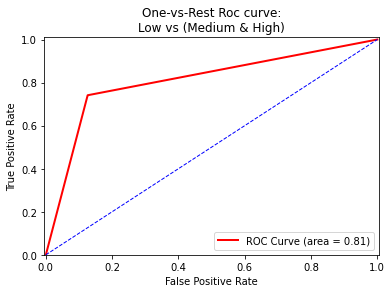

In [69]:
# show One vs Rest ROC curve for low

plt.figure()

# plot the roc curve
plt.plot(fpr_low, tpr_low, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_low)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nLow vs (Medium & High)')
plt.legend(loc="lower right")

plt.show()

In [70]:
# calculate fpr, tpr, thresholds for positive label of medium
fpr_med, tpr_med, thresholds_med = metrics.roc_curve(y_test, y_predict_prob_dt_time[:,1], pos_label="medium")
print(fpr_med)
print(tpr_med)
print(thresholds_med)

[0.         0.39604717 0.39605324 1.        ]
[0.         0.20807687 0.20808862 1.        ]
[2.  1.  0.5 0. ]


In [71]:
# compute auc for medium

AUC_med = metrics.auc(fpr_med, tpr_med)
print(AUC_med)

0.40601599361253204


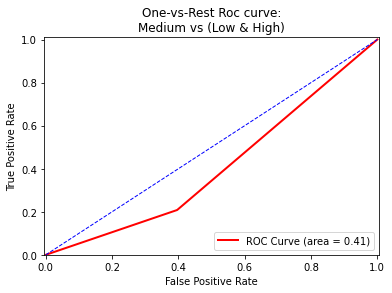

In [72]:
# show One vs Rest ROC curve for medium

plt.figure()

# plot the roc curve
plt.plot(fpr_med, tpr_med, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_med)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nMedium vs (Low & High)')
plt.legend(loc="lower right")

plt.show()

In [73]:
# calculate fpr, tpr, thresholds for positive label of high
fpr_hi, tpr_hi, thresholds_hi = metrics.roc_curve(y_test, y_predict_prob_dt_time[:,1], pos_label="high")
print(fpr_hi)
print(tpr_hi)
print(thresholds_hi)

[0.         0.47234216 0.47234809 1.        ]
[0.         0.04010105 0.04011338 1.        ]
[2.  1.  0.5 0. ]


In [74]:
# compute auc for high

AUC_hi = metrics.auc(fpr_hi, tpr_hi)
print(AUC_hi)

0.283879853056114


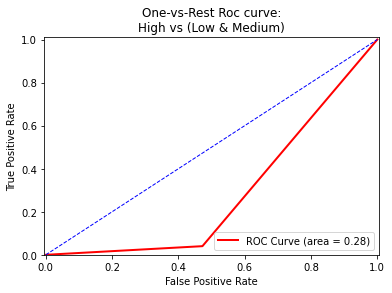

In [75]:
# show One vs Rest ROC curve for high

plt.figure()

# plot the roc curve
plt.plot(fpr_hi, tpr_hi, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_hi)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nHigh vs (Low & Medium)')
plt.legend(loc="lower right")

plt.show()

In [76]:
# onehot encode labels so we can perform One Vs Rest micro averaged

label_bin = LabelBinarizer().fit(y_train)
y_encoded_test = label_bin.transform(y_test)
y_encoded_test.shape

(249976, 3)

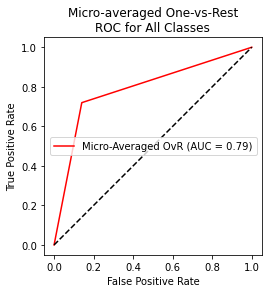

In [77]:
# Micro averaged OvR ROC Curve 

metrics.RocCurveDisplay.from_predictions(y_encoded_test.ravel(), y_predict_prob_dt_time_ravel, name="Micro-Averaged OvR", color="red")

plt.plot([0, 1], [0, 1], "k--")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nROC for All Classes")
plt.legend()
plt.show()

In [78]:
# Calculate Macro average OvR ROC AUC
macro_avg_auc_dt = metrics.roc_auc_score(y_test, y_predict_prob_dt_time, multi_class="ovr", average="macro")
print(macro_avg_auc_dt)

0.7902305573032211


In [79]:
# Calculate micro average precision score
micro_avg_score_dt = metrics.precision_score(y_test, y_predict_dt_time, average='micro')
print(micro_avg_score_dt)

0.719681089384581


In [80]:
# calculate macro average precision score
macro_avg_score_dt = metrics.precision_score(y_test, y_predict_dt_time, average='macro')
print(macro_avg_score_dt)

0.7207965819649894


### KNN Model

In [81]:
# try knn with k ~= 999 (square root of samples)
my_knn = KNeighborsClassifier(n_neighbors=999)
my_knn.fit(X_train, y_train)

my_knn_time = KNeighborsClassifier(n_neighbors=999)
my_knn_time.fit(X_train_time, y_train)


KNeighborsClassifier(n_neighbors=999)

In [82]:
y_predict_knn = my_knn.predict(X_test)
y_predict_knn_time = my_knn_time.predict(X_test_time)


In [83]:
#test difference in accuracy wiht/without using time features 

accuracy_knn = accuracy_score(y_test, y_predict_knn)
print("k = 999 - Accuracy without time = ", accuracy_knn)

accuracy_knn_time = accuracy_score(y_test, y_predict_knn_time)
print("k = 999 - Accuracy with time = ", accuracy_knn_time)

k = 999 - Accuracy without time =  0.7454515633500816
k = 999 - Accuracy with time =  0.3800044804301213


In [84]:
#Using model without time because accuracy is significantly better
# predict knn probability 
y_predict_knn_prob = my_knn.predict_proba(X_test)


In [85]:
print(y_predict_knn_prob)

[[0.15215215 0.11411411 0.73373373]
 [0.01801802 0.69169169 0.29029029]
 [0.80780781 0.02302302 0.16916917]
 ...
 [0.04604605 0.57757758 0.37637638]
 [0.10810811 0.23023023 0.66166166]
 [0.64864865 0.01501502 0.33633634]]


In [86]:
# create lists for different values k and their corresponding accuracy score
k_list = [15, 27, 59, 99]
accuracy_list = []
best_knn = 0
best_knn_predict = []

for i in k_list:
    local_knn = KNeighborsClassifier(n_neighbors=i)
    local_knn.fit(X_train, y_train)
    local_y_predict = local_knn.predict(X_test)
    local_accuracy = accuracy_score(y_test, local_y_predict)
    accuracy_list.append(local_accuracy)
    if local_accuracy == max(accuracy_list):
        best_knn = local_knn
        best_knn_predict = local_y_predict

In [87]:
# print accuracies to find best k
for i in range(len(k_list)):
    print("K = ", k_list[i], " - Accuracy = ", accuracy_list[i])

K =  15  - Accuracy =  0.7615131052581048
K =  27  - Accuracy =  0.7654494831503824
K =  59  - Accuracy =  0.7656054981278203
K =  99  - Accuracy =  0.7643213748519858


In [88]:
# print knn with best k size (59 in this case, better than 999)
print(best_knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 59, 'p': 2, 'weights': 'uniform'}


In [89]:
# predict knn probability for k = 59
y_predict_knn_prob = best_knn.predict_proba(X_test)

In [90]:
print(y_predict_knn_prob)

[[0.15254237 0.06779661 0.77966102]
 [0.01694915 0.69491525 0.28813559]
 [1.         0.         0.        ]
 ...
 [0.01694915 0.57627119 0.40677966]
 [0.08474576 0.13559322 0.77966102]
 [0.81355932 0.         0.18644068]]


In [91]:
y_predict_knn_prob_ravel = y_predict_knn_prob.ravel()
print(y_predict_knn_prob_ravel)

[0.15254237 0.06779661 0.77966102 ... 0.81355932 0.         0.18644068]


In [92]:
# calculate fpr, tpr, thresholds for positive label of low
fpr_low, tpr_low, thresholds_low = metrics.roc_curve(y_test, y_predict_knn_prob[:,1], pos_label="low")
print(fpr_low)
print(tpr_low)
print(thresholds_low)

[0.00000000e+00 3.06717105e-04 9.26165375e-04 2.11093537e-03
 3.58438028e-03 5.49083758e-03 7.57170264e-03 9.95928481e-03
 1.26716263e-02 1.56425723e-02 1.87638699e-02 2.22279690e-02
 2.56379415e-02 2.92223218e-02 3.31675457e-02 3.70887134e-02
 4.13406545e-02 4.58091017e-02 5.06985332e-02 5.53173319e-02
 6.04112415e-02 6.57336854e-02 7.10801855e-02 7.65770371e-02
 8.19896919e-02 8.74083607e-02 9.27969593e-02 9.86907389e-02
 1.04139478e-01 1.10285848e-01 1.16023262e-01 1.21838859e-01
 1.27858934e-01 1.33927122e-01 1.40145661e-01 1.46731057e-01
 1.66162488e-01 1.74888890e-01 1.84258797e-01 1.91656092e-01
 1.99426259e-01 2.07046074e-01 2.15201140e-01 2.24414682e-01
 2.33345562e-01 2.42108049e-01 2.51243407e-01 2.60276527e-01
 2.70061404e-01 2.80333420e-01 2.91417334e-01 3.02765867e-01
 3.15064621e-01 3.29041299e-01 3.44629744e-01 3.62425350e-01
 3.83636943e-01 4.13202066e-01 4.72434552e-01 6.41387564e-01
 1.00000000e+00]
[0.         0.01878159 0.05525753 0.10397974 0.15404007 0.2048531
 0

In [93]:
# compute auc for low

AUC_low = metrics.auc(fpr_low, tpr_low)
print(AUC_low)

0.936873425804486


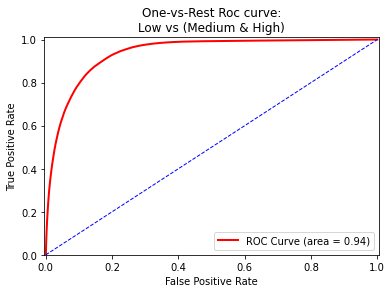

In [94]:
# show One vs Rest ROC curve for low

plt.figure()

# plot the roc curve
plt.plot(fpr_low, tpr_low, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_low)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nLow vs (Medium & High)')
plt.legend(loc="lower right")

plt.show()

In [95]:
# calculate fpr, tpr, thresholds for positive label of medium
fpr_med, tpr_med, thresholds_med = metrics.roc_curve(y_test, y_predict_knn_prob[:,1], pos_label="medium")
print(fpr_med)
print(tpr_med)
print(thresholds_med)

[0.         0.00959695 0.02827522 0.05318362 0.07886851 0.10493558
 0.12975298 0.15336318 0.17541433 0.19551819 0.21487588 0.23277159
 0.24983621 0.26544491 0.28013152 0.2941933  0.30764844 0.32028463
 0.33232025 0.34364005 0.3544806  0.36447793 0.37393536 0.38338065
 0.39212225 0.4005302  0.40830118 0.41551406 0.42239936 0.42938778
 0.43607896 0.44196331 0.44741695 0.45282206 0.45791172 0.46322584
 0.48101842 0.48746087 0.49461916 0.49921744 0.5037854  0.50761932
 0.51133193 0.516094   0.51973988 0.52327655 0.5267101  0.53022858
 0.53346801 0.5366589  0.53969814 0.54301643 0.54633472 0.54981073
 0.55374172 0.55826721 0.56402417 0.57429448 0.60417122 0.71974715
 1.        ]
[0.00000000e+00 4.81605037e-04 1.38608279e-03 3.37123526e-03
 5.73227459e-03 8.93905934e-03 1.24395057e-02 1.61866278e-02
 2.06267913e-02 2.56307851e-02 3.08697082e-02 3.69308838e-02
 4.27571301e-02 4.89122774e-02 5.56312550e-02 6.24207114e-02
 6.95743081e-02 7.70098200e-02 8.52675845e-02 9.31847014e-02
 1.01712634e

In [96]:
# compute auc for medium

AUC_med = metrics.auc(fpr_med, tpr_med)
print(AUC_med)

0.44326464441605223


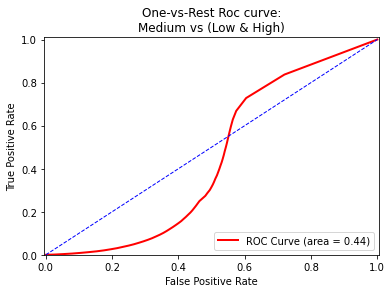

In [97]:
# show One vs Rest ROC curve for medium

plt.figure()

# plot the roc curve
plt.plot(fpr_med, tpr_med, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_med)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nMedium vs (Low & High)')
plt.legend(loc="lower right")

plt.show()

In [98]:
# calculate fpr, tpr, thresholds for positive label of high
fpr_hi, tpr_hi, thresholds_hi = metrics.roc_curve(y_test, y_predict_knn_prob[:,1], pos_label="high")
print(fpr_hi)
print(tpr_hi)
print(thresholds_hi)

[0.         0.00955393 0.02809318 0.05324851 0.07925677 0.10606464
 0.13177675 0.15625685 0.17959379 0.20134336 0.22245322 0.24262724
 0.26180618 0.27972351 0.29695376 0.3136687  0.32983279 0.34526835
 0.36053213 0.37501999 0.389188   0.40272225 0.41593072 0.42920435
 0.44167244 0.45379699 0.46510416 0.47656532 0.48733941 0.49871173
 0.50949766 0.51971498 0.52977238 0.539735   0.54939555 0.55928117
 0.58208504 0.59345144 0.60511991 0.61482192 0.62488524 0.6342141
 0.64388057 0.6548205  0.66462913 0.67427191 0.68428784 0.69401354
 0.70401763 0.71454887 0.72560134 0.73628658 0.74767075 0.76066007
 0.77446085 0.78970094 0.80684235 0.82791075 0.85892401 0.91541245
 1.        ]
[0.00000000e+00 1.23236182e-04 4.43650256e-04 7.88711566e-04
 1.33095077e-03 1.87318997e-03 2.46472364e-03 3.42596586e-03
 4.32558999e-03 5.16359603e-03 6.06322016e-03 6.80263725e-03
 7.67761415e-03 8.56491466e-03 9.60009859e-03 1.05120463e-02
 1.17197609e-02 1.30753589e-02 1.44309569e-02 1.55893770e-02
 1.70805348e-

In [99]:
# compute auc for high

AUC_hi = metrics.auc(fpr_hi, tpr_hi)
print(AUC_hi)

0.11431037834200267


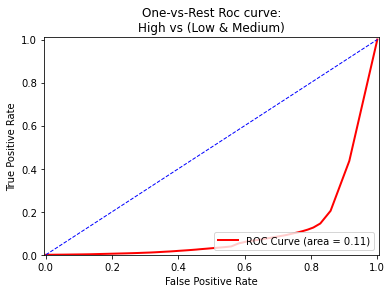

In [100]:
# show One vs Rest ROC curve for high

plt.figure()

# plot the roc curve
plt.plot(fpr_hi, tpr_hi, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_hi)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nHigh vs (Low & Medium)')
plt.legend(loc="lower right")

plt.show()

In [101]:
# onehot encode labels so we can perform One Vs Rest micro averaged

label_bin = LabelBinarizer().fit(y_train)
y_encoded_test = label_bin.transform(y_test)
y_encoded_test.shape

(249976, 3)

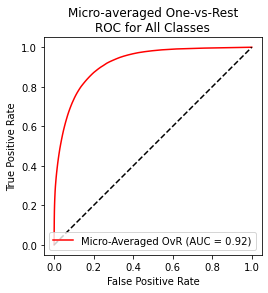

In [102]:
# Micro averaged OvR ROC Curve 

metrics.RocCurveDisplay.from_predictions(y_encoded_test.ravel(), y_predict_knn_prob_ravel, name="Micro-Averaged OvR", color="red")

plt.plot([0, 1], [0, 1], "k--")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nROC for All Classes")
plt.legend()
plt.show()

In [103]:
# Calculate Macro average OvR ROC AUC
macro_avg_auc_knn = metrics.roc_auc_score(y_test, y_predict_knn_prob, multi_class="ovr", average="macro")
print(macro_avg_auc_knn)

0.9107370859068343


In [104]:
# Calculate micro average precision score
micro_avg_score_knn = metrics.precision_score(y_test, best_knn_predict, average='micro')
print(micro_avg_score_knn)

0.7656054981278203


In [105]:
# calculate macro average precision score
macro_avg_score_knn = metrics.precision_score(y_test, best_knn_predict, average='macro')
print(macro_avg_score_knn)

0.7722427332661498


### Random Forest


In [106]:
# create random forest, 19 estimators


my_RandomForest = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=3)
my_RandomForest_time = RandomForestClassifier(n_estimators=19, bootstrap=True, random_state=3)

In [107]:
# fit on training sets
my_RandomForest.fit(X_train, y_train)

my_RandomForest_time.fit(X_train_time, y_train)

RandomForestClassifier(n_estimators=19, random_state=3)

In [108]:
# predict on X test using model

y_predict_RandomForest = my_RandomForest.predict(X_test)
print("Without time:")
print(y_predict_RandomForest)

y_predict_RandomForest_time = my_RandomForest_time.predict(X_test_time)
print("With time:")
print(y_predict_RandomForest_time)

Without time:
['medium' 'low' 'high' ... 'low' 'medium' 'high']
With time:
['medium' 'low' 'high' ... 'medium' 'medium' 'high']


In [109]:
# calculate accuracy for random forest

score_RandomForest = accuracy_score(y_test, y_predict_RandomForest)

print("Random Forest score without time:", score_RandomForest)

score_RandomForest_time = accuracy_score(y_test, y_predict_RandomForest_time)

print("Random Forest score with time:", score_RandomForest_time)

Random Forest score without time: 0.7539483790443883
Random Forest score with time: 0.7981326207315902


In [110]:
# predict probability on X test

y_predict_prob_RandomForest_time = my_RandomForest_time.predict_proba(X_test_time)
print(y_predict_prob_RandomForest_time)

[[0.05263158 0.05263158 0.89473684]
 [0.         0.84210526 0.15789474]
 [0.94736842 0.         0.05263158]
 ...
 [0.05263158 0.15789474 0.78947368]
 [0.         0.36842105 0.63157895]
 [0.73684211 0.         0.26315789]]


In [112]:
y_predict_prob_RandomForest_time_ravel = y_predict_prob_RandomForest_time.ravel()
print(y_predict_prob_RandomForest_time_ravel)

[0.05263158 0.05263158 0.89473684 ... 0.73684211 0.         0.26315789]


In [113]:
# calculate fpr, tpr, thresholds for positive label of low
fpr_low, tpr_low, thresholds_low = metrics.roc_curve(y_test, y_predict_prob_RandomForest_time[:,1], pos_label="low")
print(fpr_low)
print(tpr_low)
print(thresholds_low)

[0.         0.00270633 0.00777017 0.01433752 0.02218587 0.03118291
 0.04165339 0.05280947 0.05280947 0.05281548 0.06597425 0.06597425
 0.07950588 0.09497405 0.09497405 0.09498006 0.11141048 0.11142251
 0.11142251 0.11142251 0.11143453 0.12983756 0.12984959 0.12984959
 0.15015306 0.15015907 0.15015907 0.17282005 0.17282607 0.17282607
 0.19780246 0.2278006  0.2278006  0.26588765 0.32637707 0.32638308
 0.46829086 1.        ]
[0.         0.1149954  0.25688479 0.38333791 0.48817788 0.57283839
 0.64157278 0.69894503 0.69895698 0.69895698 0.74782255 0.7478345
 0.78918506 0.82451403 0.82452598 0.82453793 0.85598394 0.85598394
 0.85599589 0.85601979 0.85601979 0.88349921 0.88349921 0.88351115
 0.90751383 0.90751383 0.90754967 0.92760965 0.9276216  0.92763354
 0.9451009  0.96085975 0.9608717  0.97284316 0.9830225  0.9830225
 0.99216239 1.        ]
[2.         1.         0.94736842 0.89473684 0.84210526 0.78947368
 0.73684211 0.68421053 0.65789474 0.64912281 0.63157895 0.60526316
 0.57894737 0.52

In [114]:
# compute auc for low

AUC_low = metrics.auc(fpr_low, tpr_low)
print(AUC_low)

0.9441974452627667


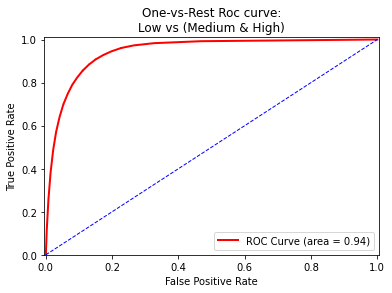

In [115]:
# show One vs Rest ROC curve for low

plt.figure()

# plot the roc curve
plt.plot(fpr_low, tpr_low, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_low)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nLow vs (Medium & High)')
plt.legend(loc="lower right")

plt.show()

In [116]:
# calculate fpr, tpr, thresholds for positive label of medium
fpr_med, tpr_med, thresholds_med = metrics.roc_curve(y_test, y_predict_prob_RandomForest_time[:,1], pos_label="medium")
print(fpr_med)
print(tpr_med)
print(thresholds_med)

[0.         0.05878285 0.13151222 0.19659193 0.2507037  0.29479387
 0.33102812 0.36163282 0.36163888 0.36163888 0.38822766 0.38823372
 0.41111596 0.43133508 0.43134115 0.43135328 0.44976463 0.44976463
 0.44977069 0.44978282 0.44979496 0.46664725 0.46665332 0.46665939
 0.4820315  0.48205576 0.49552911 0.49554124 0.49554731 0.50785591
 0.5199704  0.51997646 0.5317937  0.55069642 0.55070248 0.61544248
 1.        ]
[0.         0.00452239 0.01308556 0.02422121 0.03784711 0.05328196
 0.07114833 0.09008363 0.09008363 0.09009538 0.11235493 0.11235493
 0.13513133 0.16092656 0.16092656 0.16092656 0.18828408 0.18830757
 0.18830757 0.18830757 0.18830757 0.21863694 0.21864869 0.21864869
 0.25213786 0.25213786 0.29003195 0.29003195 0.29003195 0.33215477
 0.38278203 0.38278203 0.44606024 0.53761218 0.53761218 0.69840953
 1.        ]
[2.         1.         0.94736842 0.89473684 0.84210526 0.78947368
 0.73684211 0.68421053 0.65789474 0.64912281 0.63157895 0.60526316
 0.57894737 0.52631579 0.49473684 0.

In [117]:
# compute auc for medium

AUC_med = metrics.auc(fpr_med, tpr_med)
print(AUC_med)

0.4217892101898466


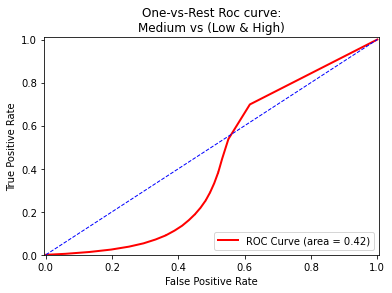

In [118]:
# show One vs Rest ROC curve for medium

plt.figure()

# plot the roc curve
plt.plot(fpr_med, tpr_med, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_med)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nMedium vs (Low & High)')
plt.legend(loc="lower right")

plt.show()

In [119]:
# calculate fpr, tpr, thresholds for positive label of high
fpr_hi, tpr_hi, thresholds_hi = metrics.roc_curve(y_test, y_predict_prob_RandomForest_time[:,1], pos_label="high")
print(fpr_hi)
print(tpr_hi)
print(thresholds_hi)

[0.         0.05929006 0.13395052 0.20225551 0.26110134 0.31085523
 0.35393974 0.39193039 0.39194224 0.42739189 0.42739781 0.45938246
 0.48990411 0.48991003 0.48991595 0.51930037 0.51931813 0.51932998
 0.51932998 0.54824647 0.54825239 0.54825832 0.5770445  0.5770445
 0.57706227 0.60611499 0.60612091 0.60612684 0.63602656 0.66936759
 0.66937352 0.70721609 0.75842707 0.75842707 0.84403931 1.        ]
[0.00000000e+00 8.01035184e-04 2.19360404e-03 3.96820507e-03
 5.75512971e-03 7.99802822e-03 1.07092242e-02 1.37038635e-02
 1.37038635e-02 1.73146836e-02 1.73146836e-02 2.11473289e-02
 2.57810093e-02 2.57810093e-02 2.57933329e-02 3.07597511e-02
 3.07597511e-02 3.07597511e-02 3.07843983e-02 3.66750878e-02
 3.66874114e-02 3.66874114e-02 4.31573110e-02 4.31696346e-02
 4.31696346e-02 4.98490357e-02 4.98613593e-02 4.98613593e-02
 5.68488508e-02 6.52042640e-02 6.52042640e-02 7.68624068e-02
 1.04763078e-01 1.04775402e-01 2.26865488e-01 1.00000000e+00]
[2.         1.         0.94736842 0.89473684 0.8

In [120]:
# compute auc for high

AUC_hi = metrics.auc(fpr_hi, tpr_hi)
print(AUC_hi)

0.12886866658841806


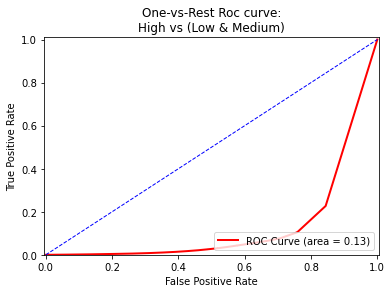

In [121]:
# show One vs Rest ROC curve for high

plt.figure()

# plot the roc curve
plt.plot(fpr_hi, tpr_hi, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_hi)

# plot random guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X and Y Axis Range
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest Roc curve:\nHigh vs (Low & Medium)')
plt.legend(loc="lower right")

plt.show()

In [122]:
# onehot encode labels so we can perform One Vs Rest micro averaged

label_bin = LabelBinarizer().fit(y_train)
y_encoded_test = label_bin.transform(y_test)
y_encoded_test.shape

(249976, 3)

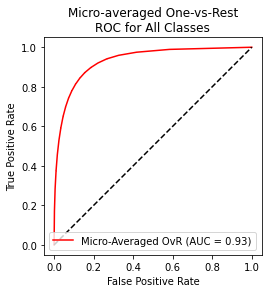

In [123]:
# Micro averaged OvR ROC Curve 

metrics.RocCurveDisplay.from_predictions(y_encoded_test.ravel(), y_predict_prob_RandomForest_time_ravel, name="Micro-Averaged OvR", color="red")

plt.plot([0, 1], [0, 1], "k--")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nROC for All Classes")
plt.legend()
plt.show()

In [125]:
# Calculate Macro average OvR ROC AUC
macro_avg_auc_rf = metrics.roc_auc_score(y_test, y_predict_prob_RandomForest_time, multi_class="ovr", average="macro")
print(macro_avg_auc_rf)

0.9260721851615736


In [126]:
# Calculate micro average precision score
micro_avg_score_rf = metrics.precision_score(y_test, y_predict_RandomForest_time, average='micro')
print(micro_avg_score_rf)

0.7981326207315902


In [127]:
# calculate macro average precision score
macro_avg_score_rf = metrics.precision_score(y_test, y_predict_RandomForest_time, average='macro')
print(macro_avg_score_rf)

0.8009578091267776
